In [1]:
%%capture
%run receptor_tools.ipynb

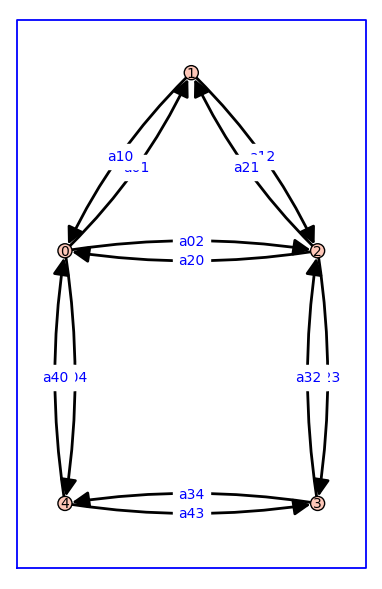

In [2]:
var('p0 p1 p2 p3 p4 a01 a10 a02 a20 a04 a40 a12 a21 a23 a32 a34 a43')
d = {0: {1:a01, 2:a02, 4:a04}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20, 3:a23}, 3: {2:a32, 4:a34}, 4: {3:a43, 0:a40}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (2,-2), 4: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [3]:
Q = generator(G.weighted_adjacency_matrix(sparse=False))

In [4]:
z = hill_diagramatic_method(Q)
for i in range(5):
    print('z[%s] ='%i, f'{expand(z[i])}')

z[0] = a10*a20*a32*a40 + a12*a20*a32*a40 + a10*a21*a32*a40 + a10*a20*a34*a40 + a12*a20*a34*a40 + a10*a21*a34*a40 + a10*a23*a34*a40 + a12*a23*a34*a40 + a10*a20*a32*a43 + a12*a20*a32*a43 + a10*a21*a32*a43
z[1] = a01*a20*a32*a40 + a01*a21*a32*a40 + a02*a21*a32*a40 + a01*a20*a34*a40 + a01*a21*a34*a40 + a02*a21*a34*a40 + a01*a23*a34*a40 + a01*a20*a32*a43 + a01*a21*a32*a43 + a02*a21*a32*a43 + a04*a21*a32*a43
z[2] = a02*a10*a32*a40 + a01*a12*a32*a40 + a02*a12*a32*a40 + a02*a10*a34*a40 + a01*a12*a34*a40 + a02*a12*a34*a40 + a02*a10*a32*a43 + a04*a10*a32*a43 + a01*a12*a32*a43 + a02*a12*a32*a43 + a04*a12*a32*a43
z[3] = a02*a10*a23*a40 + a01*a12*a23*a40 + a02*a12*a23*a40 + a04*a10*a20*a43 + a04*a12*a20*a43 + a04*a10*a21*a43 + a02*a10*a23*a43 + a04*a10*a23*a43 + a01*a12*a23*a43 + a02*a12*a23*a43 + a04*a12*a23*a43
z[4] = a04*a10*a20*a32 + a04*a12*a20*a32 + a04*a10*a21*a32 + a04*a10*a20*a34 + a04*a12*a20*a34 + a04*a10*a21*a34 + a02*a10*a23*a34 + a04*a10*a23*a34 + a01*a12*a23*a34 + a02*a12*a23*a34 + a

In [5]:
def myHouseGraph():
    H = DiGraph()
    vertex_vars = ['a0','a1','a2','a3','a4']
    edge_vars = ['a','b','c','d','e','f','A','B','C','D','E','F']
    V=PolynomialRing(ZZ,names=vertex_vars,order='invlex')
    V.inject_variables()
    E=PolynomialRing(ZZ,names=edge_vars,order='lex')
    E.inject_variables()
    H.add_edge(a0,a1,E.gen(edge_vars.index('a')))
    H.add_edge(a1,a0,E.gen(edge_vars.index('A')))
    H.add_edge(a0,a2,E.gen(edge_vars.index('c')))
    H.add_edge(a2,a0,E.gen(edge_vars.index('C')))
    H.add_edge(a0,a4,E.gen(edge_vars.index('F')))
    H.add_edge(a4,a0,E.gen(edge_vars.index('f')))
    H.add_edge(a1,a2,E.gen(edge_vars.index('b')))
    H.add_edge(a2,a1,E.gen(edge_vars.index('B')))
    H.add_edge(a2,a3,E.gen(edge_vars.index('d')))
    H.add_edge(a3,a2,E.gen(edge_vars.index('D')))
    H.add_edge(a3,a4,E.gen(edge_vars.index('e')))
    H.add_edge(a4,a3,E.gen(edge_vars.index('E')))
    return H, E

Defining a0, a1, a2, a3, a4
Defining a, b, c, d, e, f, A, B, C, D, E, F


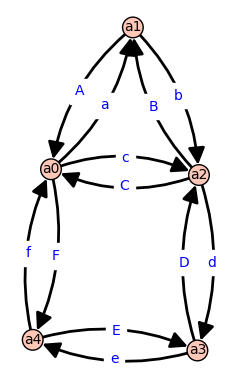

In [6]:
H, P = myHouseGraph()
H.show(edge_labels=True,layout='spring')

In [7]:
def tree_polynomial(G,P=None,root=None):
    if P==None:
        edge_vars = []
        f = 0
        #edge_coeff = []
        for e in G.edges(sort=True):
            f += e[2]
            #print(e,e[2].monomials()[0],list(e[2].monomials()[0]))
        print(f.variables())
        edge_vars = list(f.variables()) 
        #    edge_coeff.append(e[2]/e[2].monomials()[0])
        P = PolynomialRing(ZZ,names=edge_vars)
    Trees = []
    if G.is_directed():
        if root != None:
            T = P(0)
            for b in G.in_branchings(source=root,spanning=True):
                t = P(1)
                for e in b.edges(sort=True):
                    t *= P(e[2])
                T += t
            return T  
        else:  
            for r in G.vertices(sort=True):
                #print('r=',r)
                T = P(0)
                for b in G.in_branchings(source=r,spanning=True):
                    #b.show(figsize=10,edge_labels=true)
                    t = P(1)
                    for e in b.edges(sort=True):
                        #print(e)
                        #t *= P(e[2].monomials()[0])
                        t *= P(e[2])
                    T += t
                Trees.append(T)
                #return Trees
            return Trees
    else:
        T = 0
        for b in G.spanning_trees():
            t = 1
            for e in b.edges(sort=True):
                t *= G.edge_label(e[0],e[1])
            T += t
        return P(T) 

In [8]:
TT = tree_polynomial(H,P)
for T in TT:
    show(T)

b*d*e*f + b*e*f*C + b*f*C*D + b*C*D*E + d*e*f*A + e*f*A*B + e*f*A*C + f*A*B*D + f*A*C*D + A*B*D*E + A*C*D*E

a*d*e*f + a*e*f*B + a*e*f*C + a*f*B*D + a*f*C*D + a*B*D*E + a*C*D*E + c*e*f*B + c*f*B*D + c*B*D*E + B*D*E*F

a*b*e*f + a*b*f*D + a*b*D*E + b*c*e*f + b*c*f*D + b*c*D*E + b*D*E*F + c*e*f*A + c*f*A*D + c*A*D*E + A*D*E*F

a*b*d*f + a*b*d*E + b*c*d*f + b*c*d*E + b*d*E*F + b*C*E*F + c*d*f*A + c*d*A*E + d*A*E*F + A*B*E*F + A*C*E*F

a*b*d*e + b*c*d*e + b*d*e*F + b*e*C*F + b*C*D*F + c*d*e*A + d*e*A*F + e*A*B*F + e*A*C*F + A*B*D*F + A*C*D*F

In [9]:
T = tree_polynomial(H,P,a0)
show(T)

b*d*e*f + b*e*f*C + b*f*C*D + b*C*D*E + d*e*f*A + e*f*A*B + e*f*A*C + f*A*B*D + f*A*C*D + A*B*D*E + A*C*D*E

In [10]:
print(H.vertices(sort=True))

[a0, a1, a2, a3, a4]


In [11]:
for v in H.vertices(sort=True):
    T = tree_polynomial(H,P,v)
    print(v,':',T)

a0 : b*d*e*f + b*e*f*C + b*f*C*D + b*C*D*E + d*e*f*A + e*f*A*B + e*f*A*C + f*A*B*D + f*A*C*D + A*B*D*E + A*C*D*E
a1 : a*d*e*f + a*e*f*B + a*e*f*C + a*f*B*D + a*f*C*D + a*B*D*E + a*C*D*E + c*e*f*B + c*f*B*D + c*B*D*E + B*D*E*F
a2 : a*b*e*f + a*b*f*D + a*b*D*E + b*c*e*f + b*c*f*D + b*c*D*E + b*D*E*F + c*e*f*A + c*f*A*D + c*A*D*E + A*D*E*F
a3 : a*b*d*f + a*b*d*E + b*c*d*f + b*c*d*E + b*d*E*F + b*C*E*F + c*d*f*A + c*d*A*E + d*A*E*F + A*B*E*F + A*C*E*F
a4 : a*b*d*e + b*c*d*e + b*d*e*F + b*e*C*F + b*C*D*F + c*d*e*A + d*e*A*F + e*A*B*F + e*A*C*F + A*B*D*F + A*C*D*F


In [12]:
def cycle_fluxes(G,P,verbose=True):
    Cvert3 = []  
    Cvert2 = [] 
    for C in G.all_simple_cycles():
        if len(C) > 3:
            Cvert3.append(C)
        else:
            Cvert2.append(C)
    Cvert2.sort()
    Cvert3Sort = Cvert3.copy()
    Cvert3Sort.sort()
    Cvert3SortP = Cvert3Sort.copy()
    for i in range(len(Cvert3Sort)/2):
        Cvert3SortP.remove(Cvert3SortP[i][::-1])
    Cvert3SortP2 = []
    for i in range(3,100): # arbitrary max cycle length 
        Cvert3SortP2 += [ C for C in Cvert3SortP if len(C)==i ]
    Cvert3SortP = Cvert3SortP2.copy()
    Cvert3SortM = []
    for i in range(len(Cvert3SortP)):  
        Cvert3SortM.append(Cvert3SortP[i][::-1])
    CvertP = Cvert3SortP + Cvert2
    CvertM = Cvert3SortM + Cvert2
    ncycles = len(CvertP)

    CedgeP = []
    CedgeM = []
    ThetaP = []
    ThetaM = []
    for i in range(ncycles):
        CPe = [ G.edge_label(CvertP[i][j],CvertP[i][j+1]) for j in range(len(CvertP[i])-1)]
        CMe = [ G.edge_label(CvertM[i][j],CvertM[i][j+1]) for j in range(len(CvertM[i])-1)]
        TPe = prod(CPe)
        TMe = prod(CMe)
        CedgeP.append(CPe)
        ThetaP.append(TPe)
        CedgeM.append(CMe)
        ThetaM.append(TMe)

    Tkappa = []
    ThetaPMTkappa = []
    for i in range(ncycles):
        CP=CvertP[i]
        #print('CP=',CP)
        H = G.copy()
        #show(H,edge_labels=True) ######
        H.allow_multiple_edges(True)
        #print([None]+CP)
        H.merge_vertices([None]+CP) # None becomes vertex 0 (as opposed to a0, a1, ...)
        if H.order():
            #show(H,edge_labels=True) ######
            T = tree_polynomial(H,P,root=0) 
        else:
            T = P(1)
        Tkappa.append(T)
        ThetaPMTkappa.append((ThetaP[i]-ThetaM[i])*Tkappa[i])

    if verbose:
        print('\ntotal of',len(Cvert2),'+ 2 *',len(Cvert3)/2,'cycles.\n') 
        for i in range(ncycles):
            H = G.copy()
            for e in H.edges(sort=True):
                H.set_edge_label(e[0],e[1],0)
            for j in range(len(CvertP[i])-1):
                H.set_edge_label(CvertP[i][j],CvertP[i][j+1],1)
                H.set_edge_label(CvertM[i][j],CvertM[i][j+1],-1)
            if ThetaP[i] == ThetaM[i]: 
                print(i,'=>',CvertP[i],'-',CvertM[i],'=>',CedgeP[i],'-',CedgeM[i],'=>',ThetaP[i]-ThetaM[i],'@ (',Tkappa[i],')')
            else:
                print(i,'=>',CvertP[i],'-',CvertM[i],'=>',CedgeP[i],'-',CedgeM[i],'=>',(ThetaP[i]-ThetaM[i]).factor(),'@ (',Tkappa[i],')')
            H.show(color_by_label=True,edge_labels=True)
            
    return ncycles, CedgeP, CedgeM, ThetaP, ThetaM, Tkappa, ThetaPMTkappa

In [13]:
Trees = tree_polynomial(H)
T = [0]*len(Trees)
for i in range(len(Trees)):
    T[i] = Trees[i]
    print('T[%s] = ' %(i),T[i])
TT = sum(T)

(a, b, c, d, e, f, A, B, C, D, E, F)
T[0] =  b*d*e*f + d*e*f*A + e*f*A*B + b*e*f*C + e*f*A*C + f*A*B*D + b*f*C*D + f*A*C*D + A*B*D*E + b*C*D*E + A*C*D*E
T[1] =  a*d*e*f + a*e*f*B + c*e*f*B + a*e*f*C + a*f*B*D + c*f*B*D + a*f*C*D + a*B*D*E + c*B*D*E + a*C*D*E + B*D*E*F
T[2] =  a*b*e*f + b*c*e*f + c*e*f*A + a*b*f*D + b*c*f*D + c*f*A*D + a*b*D*E + b*c*D*E + c*A*D*E + b*D*E*F + A*D*E*F
T[3] =  a*b*d*f + b*c*d*f + c*d*f*A + a*b*d*E + b*c*d*E + c*d*A*E + b*d*E*F + d*A*E*F + A*B*E*F + b*C*E*F + A*C*E*F
T[4] =  a*b*d*e + b*c*d*e + c*d*e*A + b*d*e*F + d*e*A*F + e*A*B*F + b*e*C*F + e*A*C*F + A*B*D*F + b*C*D*F + A*C*D*F



total of 6 + 2 * 3 cycles.

0 => [a0, a1, a2, a0] - [a0, a2, a1, a0] => [a, b, C] - [c, B, A] => (-1) * (-a*b*C + c*A*B) @ ( e*f + f*D + D*E )


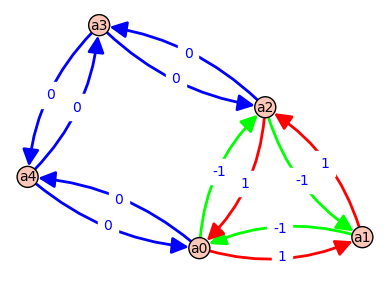

1 => [a0, a2, a3, a4, a0] - [a0, a4, a3, a2, a0] => [c, d, e, f] - [F, E, D, C] => (-1) * (-c*d*e*f + C*D*E*F) @ ( b + A )


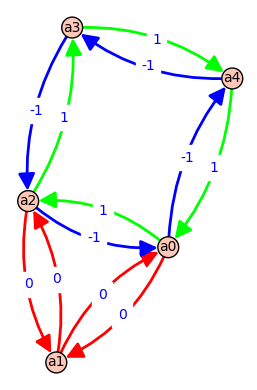

2 => [a0, a1, a2, a3, a4, a0] - [a0, a4, a3, a2, a1, a0] => [a, b, d, e, f] - [F, E, D, B, A] => (-1) * (-a*b*d*e*f + A*B*D*E*F) @ ( 1 )


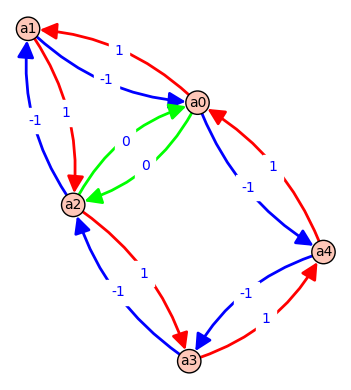

3 => [a0, a1, a0] - [a0, a1, a0] => [a, A] - [a, A] => 0 @ ( d*e*f + e*f*B + e*f*C + f*B*D + f*C*D + B*D*E + C*D*E )


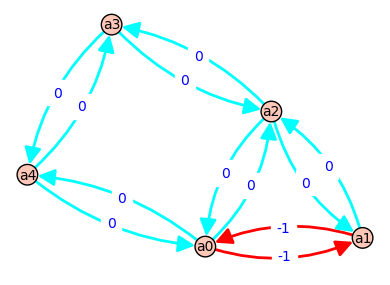

4 => [a0, a2, a0] - [a0, a2, a0] => [c, C] - [c, C] => 0 @ ( b*e*f + b*f*D + b*D*E + e*f*A + f*A*D + A*D*E )


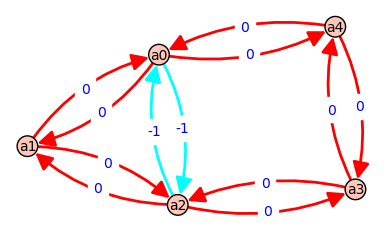

5 => [a0, a4, a0] - [a0, a4, a0] => [F, f] - [F, f] => 0 @ ( b*d*e + b*e*C + b*C*D + d*e*A + e*A*B + e*A*C + A*B*D + A*C*D )


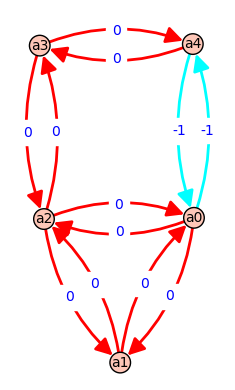

6 => [a1, a2, a1] - [a1, a2, a1] => [b, B] - [b, B] => 0 @ ( a*e*f + a*f*D + a*D*E + c*e*f + c*f*D + c*D*E + D*E*F )


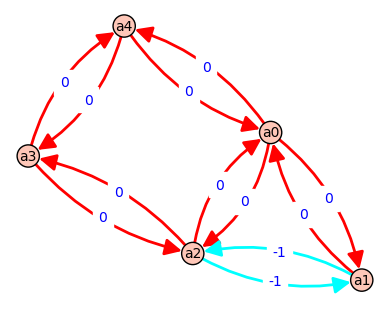

7 => [a2, a3, a2] - [a2, a3, a2] => [d, D] - [d, D] => 0 @ ( a*b*f + a*b*E + b*c*f + b*c*E + b*E*F + c*f*A + c*A*E + A*E*F )


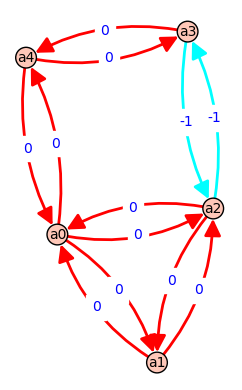

8 => [a3, a4, a3] - [a3, a4, a3] => [e, E] - [e, E] => 0 @ ( a*b*d + b*c*d + b*d*F + b*C*F + c*d*A + d*A*F + A*B*F + A*C*F )


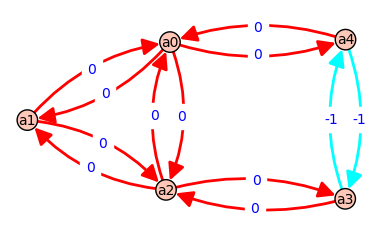

( a*b*C - c*A*B ) @ ( e*f + f*D + D*E )
( c*d*e*f - C*D*E*F ) @ ( b + A )
( a*b*d*e*f - A*B*D*E*F ) @ ( 1 )
( a*A - a*A ) @ ( d*e*f + e*f*B + e*f*C + f*B*D + f*C*D + B*D*E + C*D*E )
( c*C - c*C ) @ ( b*e*f + b*f*D + b*D*E + e*f*A + f*A*D + A*D*E )
( f*F - f*F ) @ ( b*d*e + b*e*C + b*C*D + d*e*A + e*A*B + e*A*C + A*B*D + A*C*D )
( b*B - b*B ) @ ( a*e*f + a*f*D + a*D*E + c*e*f + c*f*D + c*D*E + D*E*F )
( d*D - d*D ) @ ( a*b*f + a*b*E + b*c*f + b*c*E + b*E*F + c*f*A + c*A*E + A*E*F )
( e*E - e*E ) @ ( a*b*d + b*c*d + b*d*F + b*C*F + c*d*A + d*A*F + A*B*F + A*C*F )


In [14]:
ncycles, CedgeP, CedgeM, ThetaP, ThetaM, Tkappa, ThetaPMTkappa = cycle_fluxes(H,P,verbose=True)
for i in range(ncycles):
    print('(',ThetaP[i],'-',ThetaM[i],') @ (',Tkappa[i],')')